<a href="https://www.kaggle.com/code/argada/stock-analysis-with-pyspark?scriptVersionId=174765968" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ** Notebook is under construction **

Comments and suggestions are appreciated :)

In [1]:
import numpy as np 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nyse/prices-split-adjusted.csv
/kaggle/input/nyse/fundamentals.csv
/kaggle/input/nyse/prices.csv
/kaggle/input/nyse/securities.csv


In [2]:
pip install pyspark findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=1e7b623b3dda2a73639433db22299bf6ee8d740ee624dc37c4d2180abc45e63a
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local") \
    .appName("Stock Data Analysis") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/29 20:38:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
#git clone https://github.com/apache/hadoop.git
#cd hadoop
#git checkout branch-<VERSION>
#mvn package -Pdist,native -DskipTests -Dtar
#cp -R hadoop-dist/target/hadoop-<VERSION>/lib $HADOOP_HOME

spark.sparkContext.setLogLevel("ERROR") 

In [5]:
prices_split_adjusted = "/kaggle/input/nyse/prices-split-adjusted.csv"
fundamentals = "/kaggle/input/nyse/fundamentals.csv"
prices = "/kaggle/input/nyse/prices.csv"
securities = "/kaggle/input/nyse/securities.csv"

psa_df = spark.read.csv(prices_split_adjusted, header=True, inferSchema=True)
fun_df = spark.read.csv(fundamentals, header=True, inferSchema=True)
pri_df = spark.read.csv(prices, header=True, inferSchema=True)
sec_df = spark.read.csv(securities, header=True, inferSchema=True)

print(f"Total number of entries 'prices split adjusted': {psa_df.count()}")
print(f"Total number of entries 'fundamentals': {fun_df.count()}")
print(f"Total number of entries 'prices': {pri_df.count()}")
print(f"Total number of entries 'securities': {sec_df.count()}")

psa_df.printSchema()
fun_df.printSchema()
pri_df.printSchema()
sec_df.printSchema()

Total number of entries 'prices split adjusted': 851264
Total number of entries 'fundamentals': 1781


Total number of entries 'prices': 851264
Total number of entries 'securities': 505
root
 |-- date: date (nullable = true)
 |-- symbol: string (nullable = true)
 |-- open: double (nullable = true)
 |-- close: double (nullable = true)
 |-- low: double (nullable = true)
 |-- high: double (nullable = true)
 |-- volume: double (nullable = true)

root
 |-- _c0: integer (nullable = true)
 |-- Ticker Symbol: string (nullable = true)
 |-- Period Ending: date (nullable = true)
 |-- Accounts Payable: double (nullable = true)
 |-- Accounts Receivable: double (nullable = true)
 |-- Add'l income/expense items: double (nullable = true)
 |-- After Tax ROE: double (nullable = true)
 |-- Capital Expenditures: double (nullable = true)
 |-- Capital Surplus: double (nullable = true)
 |-- Cash Ratio: double (nullable = true)
 |-- Cash and Cash Equivalents: double (nullable = true)
 |-- Changes in Inventories: double (nullable = true)
 |-- Common Stocks: double (nullable = true)
 |-- Cost of Revenue: double 

In [6]:
psa_df.toPandas()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [7]:
psa_df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [8]:
fun_df.toPandas()

,_c0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1776,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08
1777,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08
1778,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08
1779,1779,ZTS,2015-12-31,1.313000e+09,-58000000.0,-8.100000e+07,32.0,-2.240000e+08,1.012000e+09,65.0,...,3.830000e+09,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08


In [9]:
fun_df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   _c0                                                  1781 non-null   int32  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [10]:
pri_df.toPandas()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [11]:
pri_df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   symbol  851264 non-null  object        
 2   open    851264 non-null  float64       
 3   close   851264 non-null  float64       
 4   low     851264 non-null  float64       
 5   high    851264 non-null  float64       
 6   volume  851264 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 45.5+ MB


In [12]:
sec_df.toPandas()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",None,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",None,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",None,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",None,109380


In [13]:
sec_df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int32 
dtypes: int32(1), object(7)
memory usage: 29.7+ KB


## Visualisation 

In [14]:
import matplotlib.pyplot as plt

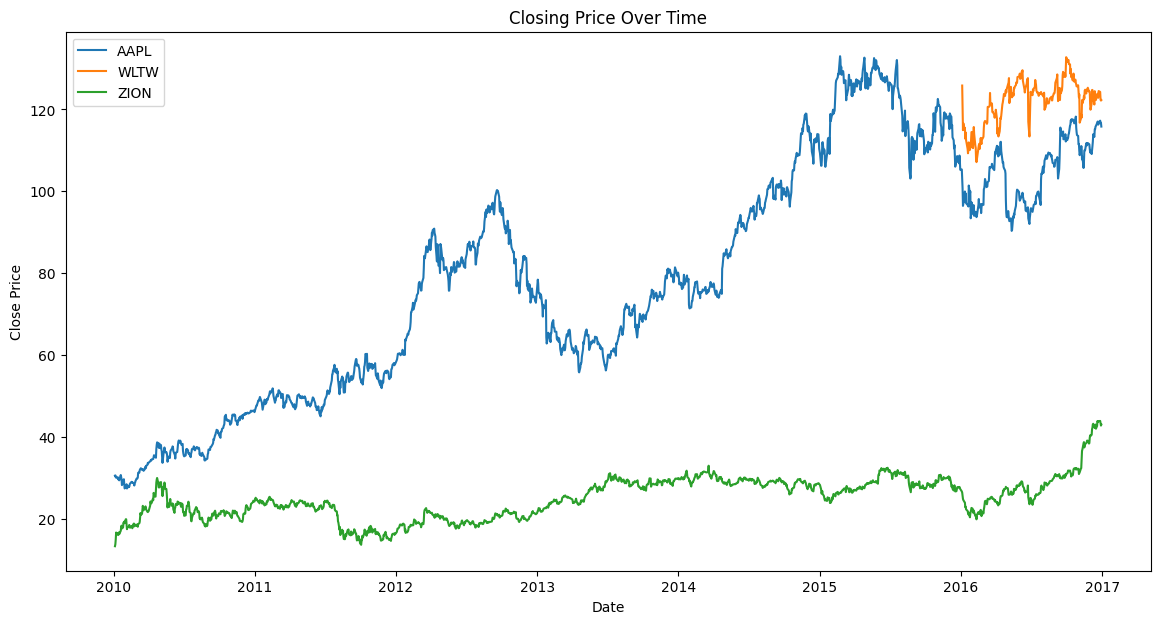

In [15]:
specific_stock_aapl = psa_df.filter(psa_df['symbol'] == 'AAPL').toPandas()
specific_stock_wltw = psa_df.filter(psa_df['symbol'] == 'WLTW').toPandas()
specific_stock_zion = psa_df.filter(psa_df['symbol'] == 'ZION').toPandas()

plt.figure(figsize=(14, 7))
plt.plot(specific_stock_aapl['date'], specific_stock_aapl['close'], label='AAPL')
plt.plot(specific_stock_wltw['date'], specific_stock_wltw['close'], label='WLTW')
plt.plot(specific_stock_zion['date'], specific_stock_zion['close'], label='ZION')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


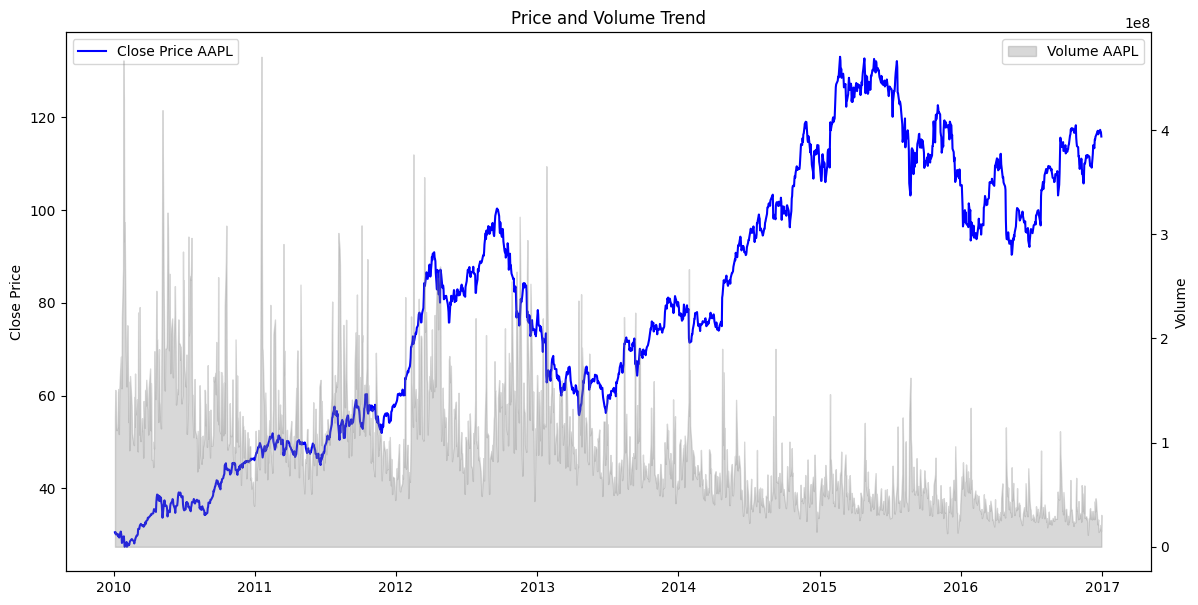

In [16]:
plt.figure(figsize=(14, 7))
ax1 = plt.gca()  # get current axis
ax2 = ax1.twinx()  # create another axis that shares the same x-axis

# Price
ax1.plot(specific_stock_aapl['date'], specific_stock_aapl['close'], color='blue', label='Close Price AAPL')
ax1.set_ylabel('Close Price')
ax1.legend(loc='upper left')

# Volume
ax2.fill_between(specific_stock_aapl['date'], specific_stock_aapl['volume'], color='gray', alpha=0.3, label='Volume AAPL')
ax2.set_ylabel('Volume')
ax2.legend(loc='upper right')

plt.title('Price and Volume Trend')
plt.xlabel('Date')
plt.show()